In [1]:
import json
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import subprocess
import sys
import time

In [2]:
root_dir = "../.."
training_dir = f"{root_dir}/training"
checkpoint_dir = f"{training_dir}/checkpoints"
model_dir = f"{training_dir}/models"
evaluator_dir = f"{root_dir}/analysis/src/evaluation/model"
data_dir = f"{root_dir}/data"
analysis_dir = f"{data_dir}/analysis"

checkpoint_files = sorted([f for f in os.listdir(checkpoint_dir) if f != "latest.json" and f != "best.json" and "cand" not in f])
checkpoints = [json.load(open(f"{checkpoint_dir}/{file}")) for file in checkpoint_files]

model_files = sorted([f for f in os.listdir(model_dir) if f != "latest.json" and f != "best.json" and "cand" not in f])

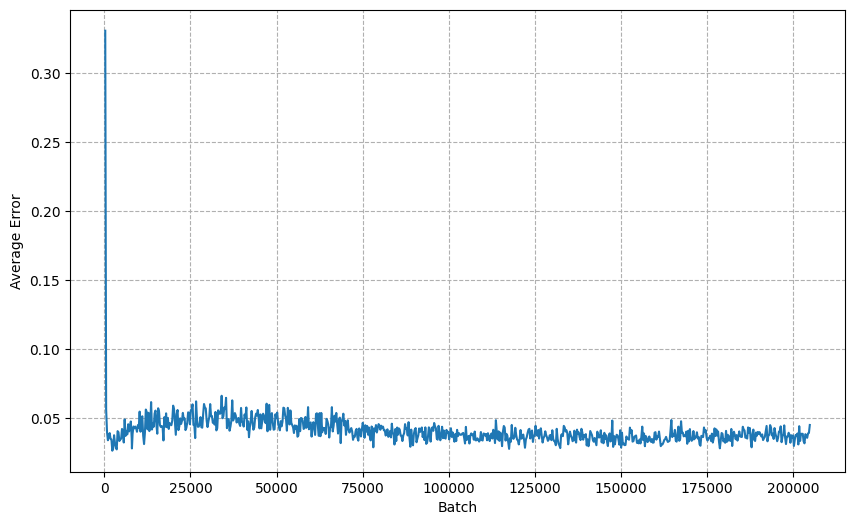

In [3]:
matplotlib.rc('figure', figsize=(10, 6))

batch = np.array([c["batch"] for c in checkpoints])
error = np.array([c["error"] for c in checkpoints])

ax = plt.gca()
ax.grid(True, which="both", linestyle="--")

plt.plot(batch, error)
plt.xlabel("Batch")
plt.ylabel("Average Error")
plt.show()

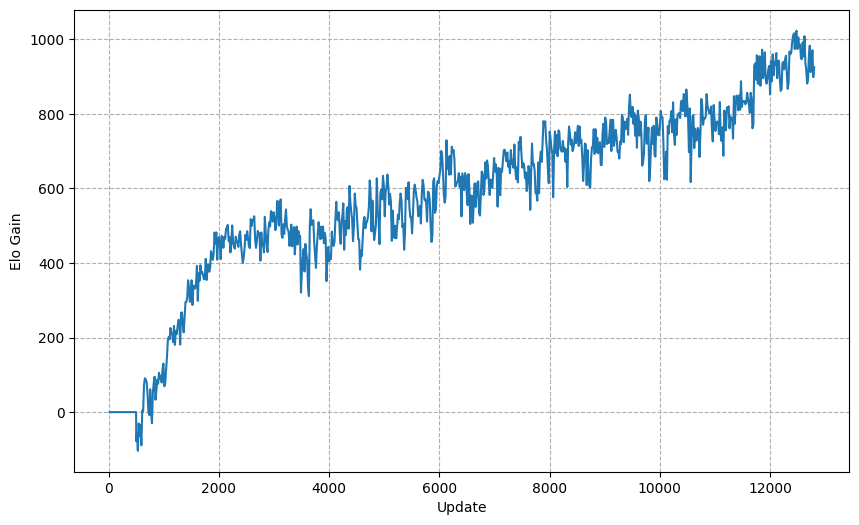

Max: update 12480, +1023


In [4]:
score = np.zeros(len(checkpoints))
updates = [c["update"] for c in checkpoints]

def elo(match):
    total = match["a_wins"] + match["b_wins"] + match["draws"]
    win_rate = (match["a_wins"] + match["draws"] / 2) / total
    
    if win_rate > 0.0 and win_rate < 1.0:
        return -400.0 * math.log10((1.0 - win_rate) / win_rate)
    else:
        return None

for i, match in enumerate([c.get("match_results") for c in checkpoints]):
    if match is not None:
        current_score = score[i]
        offset = elo(match)
        base = score[updates.index(match["b_update"])]
        score[i] = base + offset

matplotlib.rc('figure', figsize=(10, 6))

ax = plt.gca()
ax.grid(True, which="both", linestyle="--")

plt.plot(updates, score)
plt.xlabel("Update")
plt.ylabel("Elo Gain")
plt.show()

max_update = updates[score.argmax()]
max_score = score.max()

print(f"Max: update {max_update}, +{int(max_score)}")